# **Project Topic:-**  **Enhancing Concrete Quality: Predictive Modeling of Compressive Strength**



Name: Vikram Jothik Mateti, ID: 2346763

# **Importing required Modules**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import ydata_profiling and alias it as pp, since pandas_profiling is deprecated
import ydata_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import seaborn as sns

In [ ]:
df = pd.read_csv(r"/content/concrete_data.csv")

# **Data Exploration**


In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.drop_duplicates(inplace=True)

<Axes: >

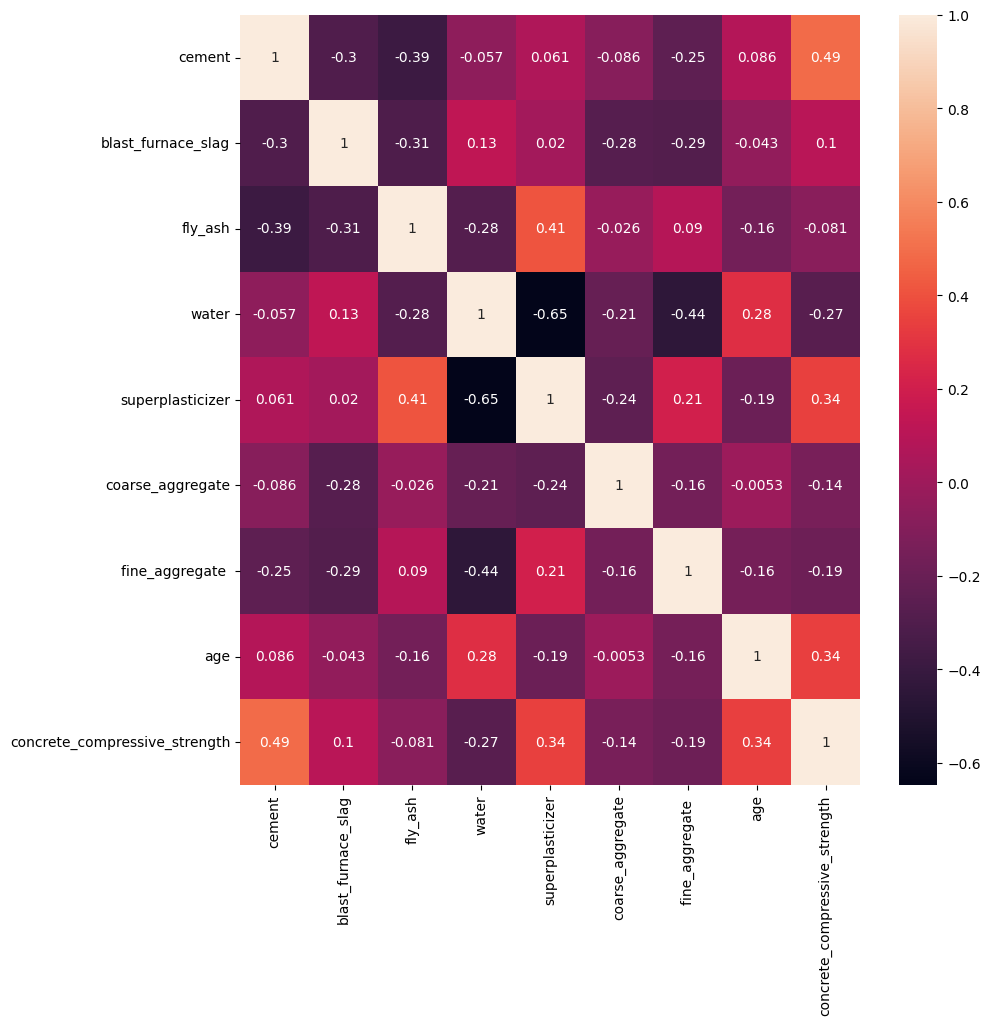

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
print(df.describe())

            cement  blast_furnace_slag      fly_ash        water  \
count  1005.000000         1005.000000  1005.000000  1005.000000   
mean    278.631343           72.043483    55.536318   182.075323   
std     104.344261           86.170807    64.207969    21.339334   
min     102.000000            0.000000     0.000000   121.800000   
25%     190.700000            0.000000     0.000000   166.600000   
50%     265.000000           20.000000     0.000000   185.700000   
75%     349.000000          142.500000   118.300000   192.900000   
max     540.000000          359.400000   200.100000   247.000000   

       superplasticizer  coarse_aggregate  fine_aggregate           age  \
count       1005.000000       1005.000000      1005.000000  1005.000000   
mean           6.033234        974.376816       772.688259    45.856716   
std            5.919967         77.579667        80.340435    63.734692   
min            0.000000        801.000000       594.000000     1.000000   
25%         

In [ ]:
print(df.corr())

                                 cement  blast_furnace_slag   fly_ash  \
cement                         1.000000           -0.303324 -0.385610   
blast_furnace_slag            -0.303324            1.000000 -0.312352   
fly_ash                       -0.385610           -0.312352  1.000000   
water                         -0.056625            0.130262 -0.283314   
superplasticizer               0.060906            0.019800  0.414213   
coarse_aggregate              -0.086205           -0.277559 -0.026468   
fine_aggregate                -0.245375           -0.289685  0.090262   
age                            0.086348           -0.042759 -0.158940   
concrete_compressive_strength  0.488283            0.103374 -0.080648   

                                  water  superplasticizer  coarse_aggregate  \
cement                        -0.056625          0.060906         -0.086205   
blast_furnace_slag             0.130262          0.019800         -0.277559   
fly_ash                       -0

# **Data Pre-Perocessing and Outlier Removal**

In [ ]:
df = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
                        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag',
                        'Fly Ash (component 3)(kg in a m^3 mixture)':'ash',
                        'Water (component 4)(kg in a m^3 mixture)':'water',
                        "Superplasticizer (component 5)(kg in a m^3 mixture)":'superplastic',
                        'Coarse Aggregate (component 6)(kg in a m^3 mixture)':'coarseagg',
                        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fineagg',
                        'Age (day)':'age',
                        'Concrete compressive strength(MPa, megapascals)':'strength'
})

In [ ]:
df.columns = ['cement', 'slag', 'ash', 'Water','superplastic','coarseagg','fineagg','age','strength']
df.head()

cement   slag  ash  Water  superplastic  coarseagg  fineagg  age  strength
0   540.0    0.0  0.0  162.0           2.5     1040.0    676.0   28     79.99
1   540.0    0.0  0.0  162.0           2.5     1055.0    676.0   28     61.89
2   332.5  142.5  0.0  228.0           0.0      932.0    594.0  270     40.27
3   332.5  142.5  0.0  228.0           0.0      932.0    594.0  365     41.05
4   198.6  132.4  0.0  192.0           0.0      978.4    825.5  360     44.30

<ipython-input-9-53990889dd24>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cement'],ax=ax2[0][0])
<ipython-input-9-53990889dd24>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['slag'],ax=ax2[0][1])
<ipython-input-9-53990889dd24>:4: UserWarning: 

`distplot` is a deprecated function

<Axes: xlabel='strength', ylabel='Density'>

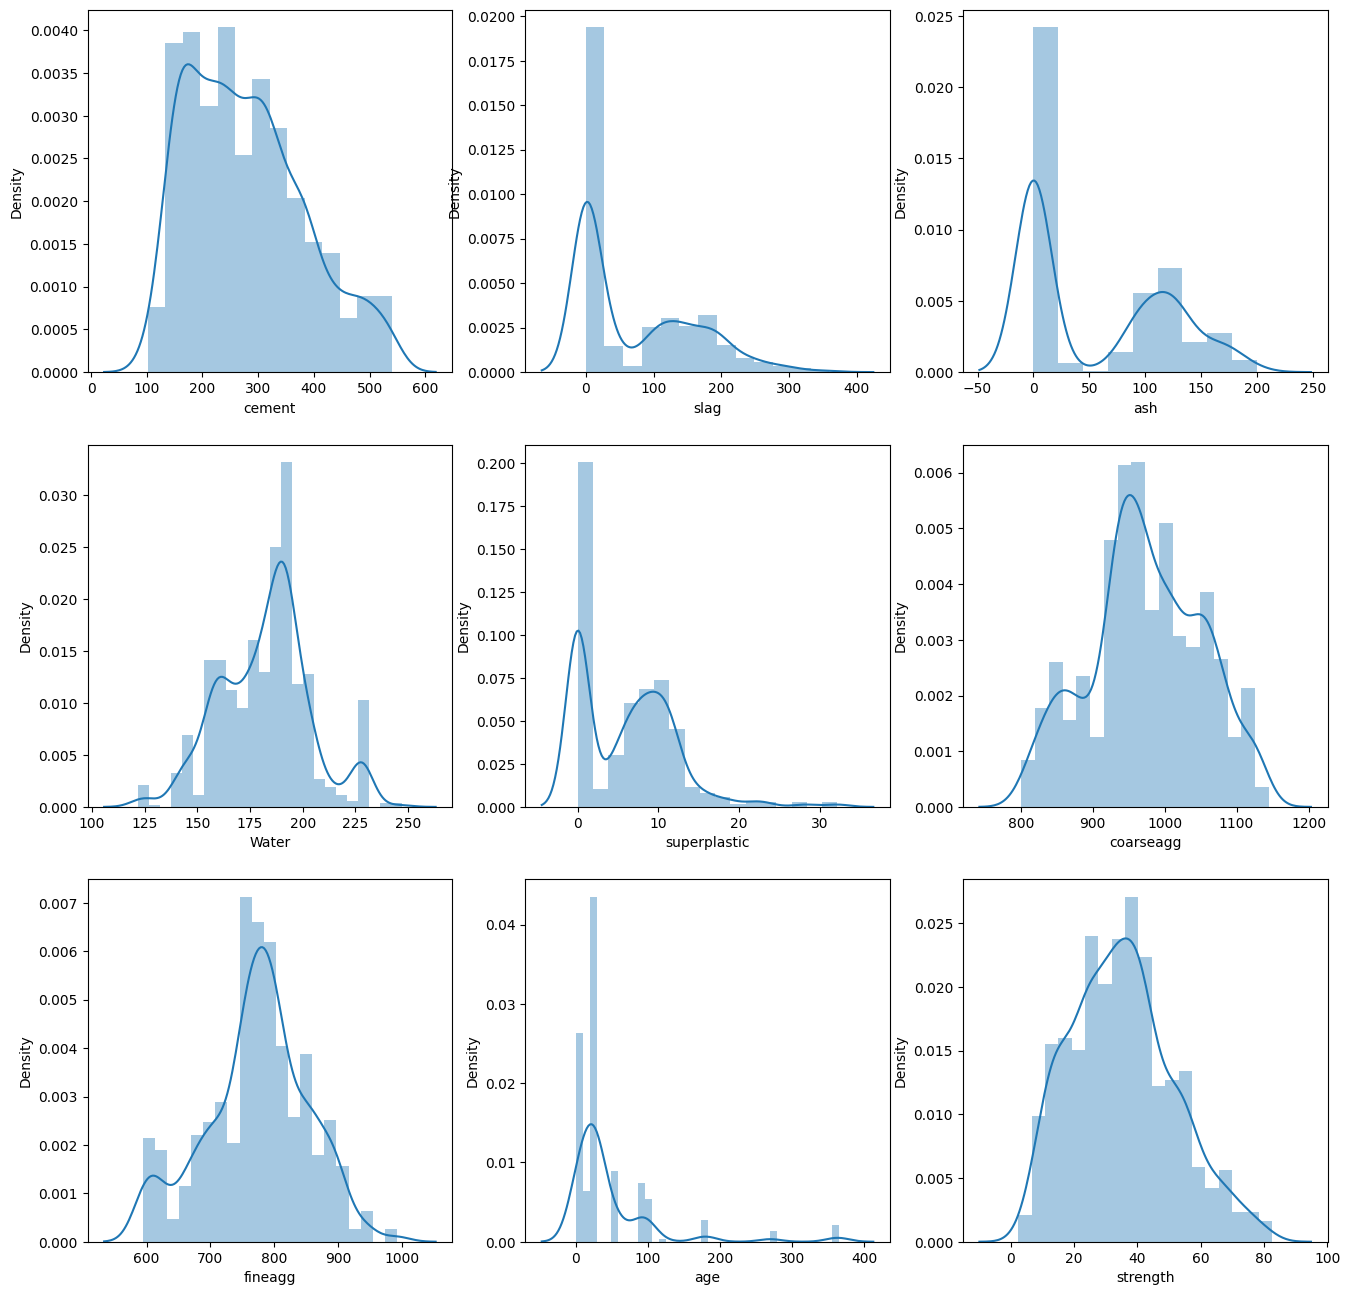

In [ ]:
fig,ax2 = plt.subplots(3,3,figsize=(16,16))
sns.distplot(df['cement'],ax=ax2[0][0])
sns.distplot(df['slag'],ax=ax2[0][1])
sns.distplot(df['ash'],ax=ax2[0][2])
sns.distplot(df['Water'],ax=ax2[1][0])
sns.distplot(df['superplastic'],ax=ax2[1][1])
sns.distplot(df['coarseagg'],ax=ax2[1][2])
sns.distplot(df['fineagg'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
sns.distplot(df['strength'],ax=ax2[2][2])

In [ ]:
print('Outliers in cement: ', df[((df.cement - df.cement.mean())/df.cement.std()).abs()>3]['cement'].count())
print('Outliers in slag: ', df[((df.slag - df.slag.mean())/df.slag.std()).abs()>3]['slag'].count())
print('Outliers in ash: ', df[((df.ash - df.ash.mean())/df.ash.std()).abs()>3]['ash'].count())
print('Outliers in water: ', df[((df.Water - df.Water.mean())/df.Water.std()).abs()>3]['Water'].count())
print('Outliers in superplastic: ', df[((df.superplastic - df.superplastic.mean())/df.superplastic.std()).abs()>3]['superplastic'].count())
print('Outliers in coarseagg: ', df[((df.coarseagg - df.coarseagg.mean())/df.coarseagg.std()).abs()>3]['coarseagg'].count())
print('Outliers in fineagg: ', df[((df.fineagg - df.fineagg.mean())/df.fineagg.std()).abs()>3]['fineagg'].count())
print('Outliers in age: ', df[((df.age - df.age.mean())/df.age.std()).abs()>3]['age'].count())

Outliers in cement:  0
Outliers in slag:  4
Outliers in ash:  0
Outliers in water:  2
Outliers in superplastic:  10
Outliers in coarseagg:  0
Outliers in fineagg:  0
Outliers in age:  33


Clearing Outliers

In [ ]:
for cols in df.columns[:-1]:
  Q1 = df[cols].quantile(0.25)
  Q3 = df[cols].quantile(0.75)
  iqr = Q3 - Q1

  low = Q1-1.5*iqr
  high = Q3+1.5*iqr
  df.loc[(df[cols] < low) | (df[cols] > high), cols] = df[cols].median()

<Axes: >

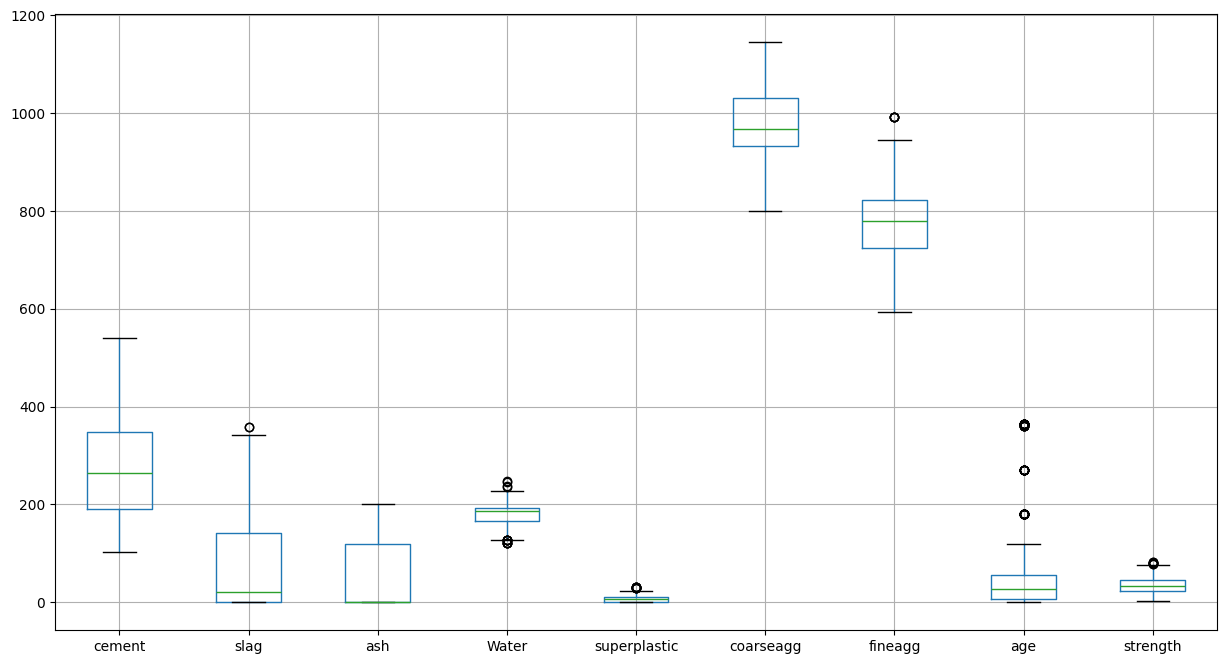

In [ ]:
df.boxplot(figsize=(15,8))

In [ ]:
df.head()

cement   slag  ash  Water  superplastic  coarseagg  fineagg  age  strength
0   540.0    0.0  0.0  162.0           2.5     1040.0    676.0   28     79.99
1   540.0    0.0  0.0  162.0           2.5     1055.0    676.0   28     61.89
2   332.5  142.5  0.0  228.0           0.0      932.0    594.0   28     40.27
3   332.5  142.5  0.0  228.0           0.0      932.0    594.0   28     41.05
4   198.6  132.4  0.0  192.0           0.0      978.4    825.5   28     44.30

# **Linear Regression**

In [ ]:
x = df.loc[:,df.columns != "concrete_compressive_strength"]
y = df.loc[:,df.columns == "concrete_compressive_strength"]
X = x.values
Y = y.values
print(X)
print(Y)

[[ 540.     0.     0.  ... 1040.   676.    28. ]
 [ 540.     0.     0.  ... 1055.   676.    28. ]
 [ 332.5  142.5    0.  ...  932.   594.   270. ]
 ...
 [ 148.5  139.4  108.6 ...  892.4  780.    28. ]
 [ 159.1  186.7    0.  ...  989.6  788.9   28. ]
 [ 260.9  100.5   78.3 ...  864.5  761.5   28. ]]
[[79.99]
 [61.89]
 [40.27]
 ...
 [23.7 ]
 [32.77]
 [32.4 ]]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.20,random_state=42)

In [ ]:
def plot_comparison (y_test, y_pred) :
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
    plt.scatter(y_test, y_test, color='red', alpha=0.7)  # Plotting original values
    plt.plot(y_test, y_test, color='green')  # Regression line
    plt.title('Comparison: Predicted vs Original Values')
    plt.xlabel('Original Values')
    plt.ylabel('Predicted Values')
    plt.legend(["Regression Line", "Predicted", "Original"])
    plt.grid(True)
    plt.show()

In [ ]:
def evaluate_predictions (y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
evaluate_predictions (y_test, y_pred)

Mean Squared Error: 125.67073068584229
R-squared Score: 0.5646489995545294


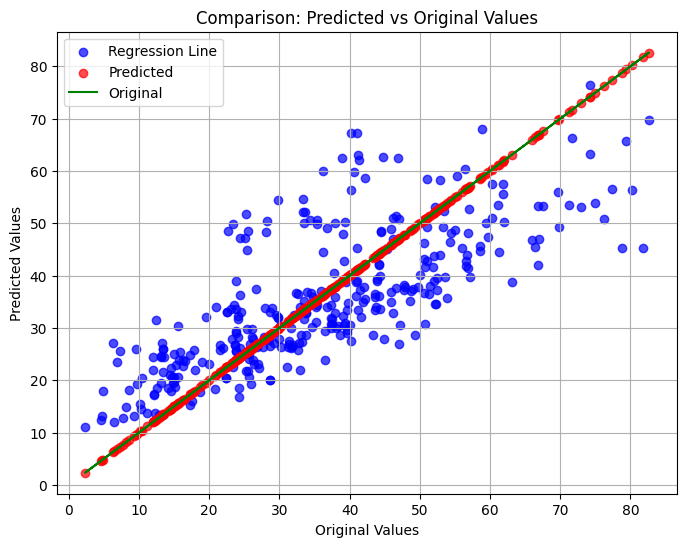

In [ ]:
plot_comparison(y_test, y_pred)

# **Support Vector Machine**

In [ ]:
scaler1 = StandardScaler()
x_train_scaled = scaler1.fit_transform(x_train)
x_test_scaled = scaler1.fit_transform(x_test)
scaler2 = StandardScaler()
y_test_scaled = scaler2.fit_transform(y_test)
y_train_scaled = scaler2.fit_transform(y_train)

In [ ]:
svr_reg = SVR(kernel="rbf")
svr_reg.fit(x_train_scaled,y_train_scaled.ravel())
y_pred = svr_reg.predict(x_test_scaled)
evaluate_predictions (y_test_scaled, y_pred)

Mean Squared Error: 0.20808790206494934
R-squared Score: 0.7919120979350507


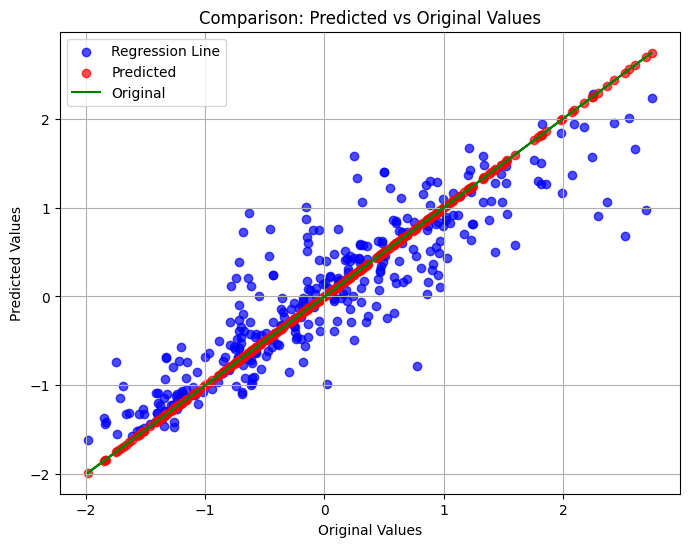

In [ ]:
plot_comparison(y_test_scaled, y_pred)

# **Decision** **Tree**

Hyper Parameter Tuning for Decision Tree

In [ ]:
# Decision Tree Hyperparameter Tuning
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor()

# Define the parameter grid for hyperparameter tuning
param_grid_dt = {
    'max_depth': [3, 20],
    'min_samples_split': [2,11],
    'min_samples_leaf': [1, 6],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up GridSearchCV for hyperparameter tuning
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the training data
grid_search_dt.fit(x_train, y_train)

# Best Model
best_dt_model = grid_search_dt.best_estimator_
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)

In [ ]:
r_dt = DecisionTreeRegressor(random_state=42)
r_dt.fit(x_train,y_train)
y_pred = r_dt.predict(x_test)
evaluate_predictions (y_test, y_pred)

Mean Squared Error: 42.088483810240966
R-squared Score: 0.8541962521103919


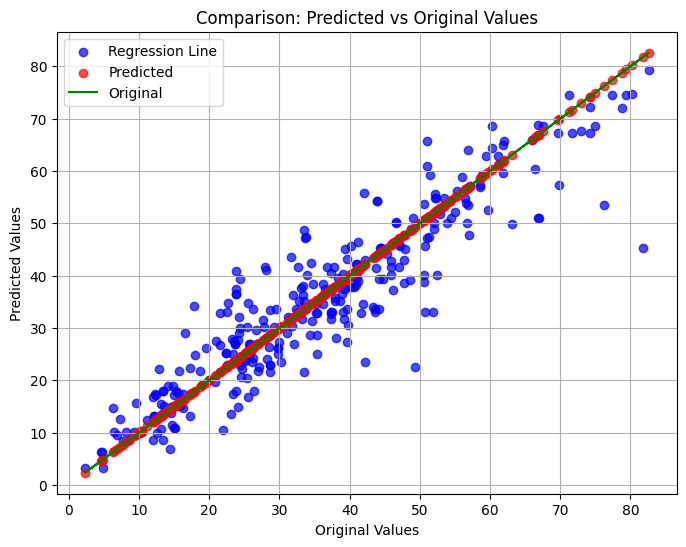

In [ ]:
plot_comparison(y_test, y_pred)

# **Random Forest**

In [ ]:
#Splitting the data into independent and dependent attributes
#independent and dependent variables
X = df.drop('strength', axis = 1)
y = df['strength']

In [ ]:
from scipy.stats import zscore

Xscaled = X.apply(zscore)
Xscaled_df = pd.DataFrame(Xscaled, columns=df.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, test_size= 0.20, random_state= 42)

Hyper Parameter Tuning for Random Forest

In [ ]:
# Random Forest Hyperparameter Tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor()
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best Model
best_rf_model = grid_search_rf.best_estimator_
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
y_pred_rf = best_rf_model.predict(X_test)

#Model Performance on Training Data
best_rf_model.score(X_train, y_train)
train_accuracy= round(best_rf_model.score(X_train, y_train)*100)
print(f"Train Accuracy:  {train_accuracy}% ")

#Model Performance on Test Data
best_rf_model.score(X_test, y_test)
test_accuracy=round(best_rf_model.score(X_test, y_test)*100)
print(f"Test Accuracy:  {test_accuracy}% ")

Train Accuracy:  98% 
Test Accuracy:  89% 


In [ ]:
from sklearn import metrics
acc_R=metrics.r2_score(y_test, y_pred_rf)
acc_R
# Mean Squared Error
mse_rf=metrics.mean_squared_error(y_test, y_pred_rf)
mse_rf
# Mean Absolute Error
mae_rf=metrics.mean_absolute_error(y_test, y_pred_rf)
mae_rf
# F1-score (Ensure y_test and y_pred_rf are rounded for classification-like comparison)
f1_score_rf=metrics.f1_score(y_test.round(), y_pred_rf.round(), average='weighted')
f1_score_rf

#Store the accuracy results for each model in a dataframe for final comparison
results_1 = pd.DataFrame({'Algorithm': ['Random Forest'], 'accuracy': acc_R,'MSE':[mse_rf],'MAE':[mae_rf],'f1_score':[f1_score_rf]},index=['1'])
results = results_1[['Algorithm','accuracy','MSE','MAE','f1_score']]
results


Algorithm  accuracy        MSE       MAE  f1_score
1  Random Forest  0.890976  29.351667  4.031939  0.084144

# **KNN Regressor**

In [ ]:
#Checking for different values of neighbors to determine K
from sklearn.neighbors import KNeighborsRegressor


diff_k=[]
for i in range(1,45):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  diff_k.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean errors')

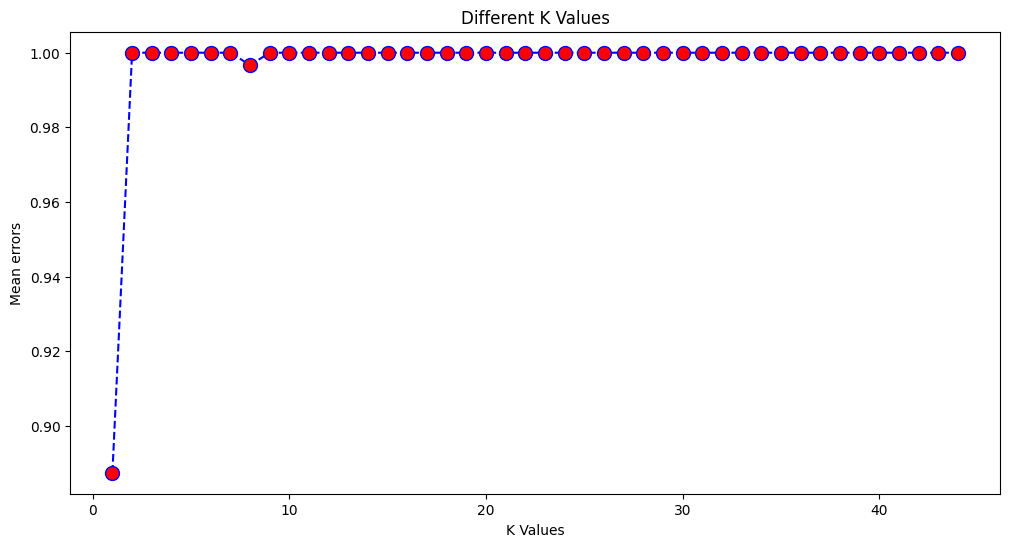

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,45),diff_k,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Different K Values')
plt.xlabel('K Values')
plt.ylabel('Mean errors')

Hyperparameter Tuning of KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Define the model
knn_model = KNeighborsRegressor()

# Using grid testing varied neighbor values
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform Grid Search
grid_search_knn = GridSearchCV(estimator=knn_model,
                               param_grid=param_grid_knn,
                               scoring='neg_mean_squared_error',
                               cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search_knn.fit(X_train, y_train)

best_knn_model = grid_search_knn.best_estimator_
#Taking the best parameters and performance
print("Best parameters for KNN:", grid_search_knn.best_params_)
print("Best score for KNN:", -grid_search_knn.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best score for KNN: 58.201436040403415


In [ ]:
y_pred_knn = best_knn_model.predict(X_test)

In [ ]:
#Model Performance on Training Data
best_knn_model.score(X_train, y_train)
train_accuracy= round(best_knn_model.score(X_train, y_train)*100)
print(f"Train Accuracy:  {train_accuracy}% ")

#Model Performance on Test Data
best_knn_model.score(X_test, y_test)
test_accuracy=round(best_knn_model.score(X_test, y_test)*100)
print(f"Test Accuracy:  {test_accuracy}% ")

Train Accuracy:  100% 
Test Accuracy:  82% 


In [ ]:
mse_knn = metrics.mean_squared_error(y_test, y_pred_knn)
mse_knn
# Mean Absolute Error
mae_knn = metrics.mean_absolute_error(y_test, y_pred_knn)
mae_knn
# F1-score (Ensure y_test and y_pred_rf are rounded for classification-like comparison)
f1_score_knn = metrics.f1_score(y_test.round(), y_pred_knn.round(), average='weighted')
f1_score_knn
KNN_df = pd.DataFrame({'Algorithm':['KNN Regressor'], 'accuracy': [acc_KNN],'MSE':[mse_knn],'MAE':[mae_knn],'f1_score':[f1_score_knn]}, index=['3'])
results = pd.concat([results, KNN_df])
results = results[['Algorithm','accuracy','MSE','MAE','f1_score']]
results

Algorithm  accuracy        MSE       MAE  f1_score
1  Random Forest  0.890976  29.351667  4.031939  0.084144
3  KNN Regressor  0.815141  49.768344  5.260993  0.119010

Overall Accuracy of all the models in Bar graph

<ipython-input-10-3845960ee9b5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Accuracy", y="Architecture", data=df, palette="viridis", orient="h")


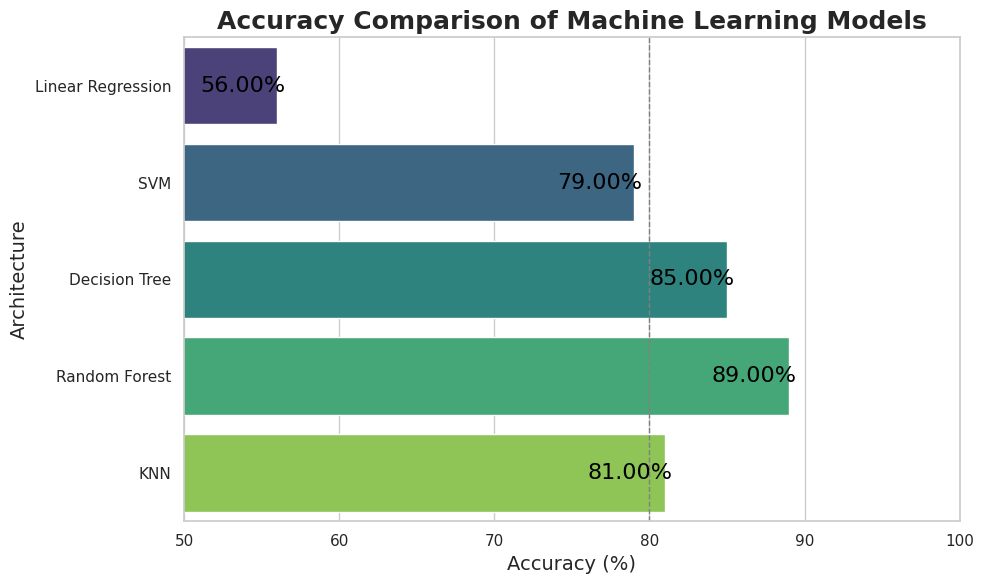

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "Architecture": [
        "Linear Regression", "SVM", "Decision Tree", "Random Forest", "KNN"
    ],
    "Accuracy": [56, 79, 85, 89, 81]
}

df = pd.DataFrame(data)

# Set a nice style
sns.set_theme(style="whitegrid")

# Create a barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Accuracy", y="Architecture", data=df, palette="viridis", orient="h")

# Add accuracy values to the bars
for i, acc in enumerate(df["Accuracy"]):
    ax.text(acc + 0.5, i, f"{acc:.2f}%", color='black', ha="right", va="center", fontsize=16)

# Customize the plot
ax.set_xlim(50, 100)  # Adjust the x-axis limit
ax.set_title("Accuracy Comparison of Machine Learning Models", fontsize=18, fontweight="bold")
ax.set_xlabel("Accuracy (%)", fontsize=14)
ax.set_ylabel("Architecture", fontsize=14)

# Add a horizontal line at 80% accuracy
ax.axvline(x=80, color='gray', linestyle='--', linewidth=1)

# Show plot
plt.tight_layout()
plt.show()

**Hence "Random Forest" seems to predict with better accuracy among all models**